## Dataset

In this homework, we'll build a model for predicting if we have an image of a dog or a cat. For this, we will use the "Dogs & Cats" dataset that can be downloaded from Kaggle.

You need to download the train.zip file.

If you have troubles downloading from Kaggle, use this link instead:

wget https://github.com/alexeygrigorev/large-datasets/releases/download/dogs-cats/train.zip
In the lectures we saw how to use a pre-trained neural network. In the homework, we'll train a much smaller model from scratch.

Note: You don't need a computer with a GPU for this homework. A laptop or any personal computer should be sufficient.

## Data Preparation

The dataset contains 12,500 images of cats and 12,500 images of dogs.

Now we need to split this data into train and validation

Create a train and validation folders
In each folder, create cats and dogs folders
Move the first 10,000 images to the train folder (from 0 to 9999) for boths cats and dogs - and put them in respective folders
Move the remaining 2,500 images to the validation folder (from 10000 to 12499)
You can do this manually or with Python (check os and shutil packages).

## Model

For this homework we will use Convolutional Neural Network (CNN. Like in the lectures, we'll use Keras.

You need to develop the model with following structure:

The shape for input should be (150, 150, 3)
Next, create a covolutional layer (Conv2D):
Use 32 filters
Kernel size should be (3, 3) (that's the size of the filter)
Use 'relu' as activation
Reduce the size of the feature map with max pooling (MaxPooling2D)
Set the pooling size to (2, 2)
Turn the multi-dimensional result into vectors using a Flatten layer
Next, add a Dense layer with 64 neurons and 'relu' activation
Finally, create the Dense layer with 1 neuron - this will be the output
The output layer should have an activation - use the appropriate activation for the binary classification case
As optimizer use SGD with the following parameters:

SGD(lr=0.002, momentum=0.8)
For clarification about kernel size and max pooling, check Week #11 Office Hours.



In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.applications.xception import decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import SGD

## Question 1

Since we have a binary classification problem, what is the best loss function for us?

Note: since we specify an activation for the output layer, we don't need to set from_logits=True

Answer: BinaryCrossEntropy

## Question 2

What's the total number of parameters of the model? You can use the summary method for that.

Answer: 11,215,873

In [5]:
def create_model():
    inputs = keras.Input(shape=(150,150,3))

    x = Conv2D(32, kernel_size=(3,3), activation='relu', name='conv_1')(inputs)
    x = MaxPooling2D(pool_size=(2,2), name='max_1')(x)
    flatten = Flatten(name='flatten')(x)
    x = Dense(64, activation='relu', name='dense_1')(flatten)

    outputs = Dense(1, activation='sigmoid', name='output')(x)
    model = keras.Model(inputs, outputs)
    return model

model = create_model()
model.summary()




Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 conv_1 (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_1 (MaxPooling2D)        (None, 74, 74, 32)        0         
                                                                 
 flatten (Flatten)           (None, 175232)            0         
                                                                 
 dense_1 (Dense)             (None, 64)                11214912  
                                                                 
 output (Dense)              (None, 1)                 65        
                                                                 
Total params: 11,215,873
Trainable params: 11,215,873
Non-tra

## Generators and Training

For the next two questions, use the following data generator for both train and validation:

ImageDataGenerator(rescale=1./255)
We don't need to do any additional pre-processing for the images.
When reading the data from train/val directories, check the class_mode parameter. Which value should it be for a binary classification problem?
Use batch_size=20
Use shuffle=True for both training and validaition
For training use .fit() with the following params:

model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=50
)
Note validation_steps=50 - this parameter says "run only 50 steps on the validation data for evaluating the results". This way we iterate a bit faster, but don't use the entire validation dataset. That's why it's important to shuffle the validation dataset as well.

In [6]:
opt = SGD(learning_rate=0.002, momentum=0.8)
loss = keras.losses.BinaryCrossentropy()

# Compile the model
model.compile(optimizer=opt,
              loss=loss,
              metrics=['accuracy'])

In [7]:
train_gen = ImageDataGenerator(rescale=1./255)

train_ds = train_gen.flow_from_directory(
    '/Users/tonygunawan/Downloads/train/',
    class_mode = 'binary',
    target_size = (150, 150),
    batch_size = 20,
    shuffle = True)

Found 19995 images belonging to 2 classes.


In [8]:
train_ds.class_indices

{'cats': 0, 'dogs': 1}

In [9]:
X, y = next(train_ds)

In [10]:
X

array([[[[0.41960788, 0.42352945, 0.4431373 ],
         [0.43137258, 0.43529415, 0.454902  ],
         [0.40784317, 0.41176474, 0.43137258],
         ...,
         [0.38823533, 0.38431376, 0.40784317],
         [0.38431376, 0.3803922 , 0.40000004],
         [0.38431376, 0.38431376, 0.3921569 ]],

        [[0.4039216 , 0.40784317, 0.427451  ],
         [0.40000004, 0.4039216 , 0.42352945],
         [0.38823533, 0.3921569 , 0.41176474],
         ...,
         [0.3921569 , 0.3921569 , 0.40000004],
         [0.3921569 , 0.3921569 , 0.3921569 ],
         [0.38823533, 0.38823533, 0.3803922 ]],

        [[0.38823533, 0.3921569 , 0.41176474],
         [0.40000004, 0.4039216 , 0.42352945],
         [0.40784317, 0.41176474, 0.43137258],
         ...,
         [0.3921569 , 0.3921569 , 0.38431376],
         [0.40000004, 0.4039216 , 0.38431376],
         [0.3803922 , 0.38431376, 0.36078432]],

        ...,

        [[0.44705886, 0.45098042, 0.47058827],
         [0.4431373 , 0.44705886, 0.4666667 ]

In [11]:
X.shape

(20, 150, 150, 3)

In [12]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    '/Users/tonygunawan/Downloads/validation/',
    class_mode = 'binary',
    target_size = (150, 150),
    batch_size = 20,
    shuffle = True)

Found 5000 images belonging to 2 classes.


In [13]:
Y, z = next(val_ds)

In [14]:
Y.shape

(20, 150, 150, 3)

In [15]:
history = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=10,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 30s 288ms/step - loss: 0.7012 - accuracy: 0.5190 - val_loss: 0.6848 - val_accuracy: 0.5890
Epoch 2/10
100/100 [==============================] - 30s 302ms/step - loss: 0.6816 - accuracy: 0.5590 - val_loss: 0.6710 - val_accuracy: 0.6140
Epoch 3/10
100/100 [==============================] - 50s 496ms/step - loss: 0.6724 - accuracy: 0.5775 - val_loss: 0.6671 - val_accuracy: 0.5860
Epoch 4/10
100/100 [==============================] - 32s 319ms/step - loss: 0.6645 - accuracy: 0.5910 - val_loss: 0.6462 - val_accuracy: 0.6200
Epoch 5/10
100/100 [==============================] - 38s 373ms/step - loss: 0.6519 - accuracy: 0.6075 - val_loss: 0.6764 - val_accuracy: 0.5780
Epoch 6/10
100/100 [==============================] - 38s 379ms/step - loss: 0.6494 - accuracy: 0.6180 - val_loss: 0.6431 - val_accuracy: 0.6110
Epoch 7/10
100/100 [==============================] - 45s 449ms/step - loss: 0.6472 - accuracy: 0.6190 - val_loss: 0.6361 - val_ac

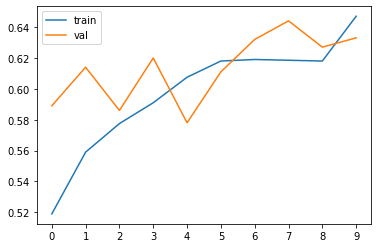

In [16]:
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.xticks(np.arange(10))
plt.legend()

## Question 3

What is the median of training accuracy for this model?

In [17]:
np.median(history.history['accuracy'])

0.6127499938011169

## Question 4

What is the standard deviation of training loss for this model?

In [18]:
np.std(history.history['loss'])

0.022373124303165993

## Data Augmentation

For the next two questions, we'll generate more data using data augmentations.

Add the following augmentations to your training data generator:

rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest'

In [19]:
train_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_ds = train_gen.flow_from_directory(
    '/Users/tonygunawan/Downloads/train/',
    class_mode = 'binary',
    target_size = (150, 150),
    batch_size = 20,
    shuffle = True
    
)

Found 19995 images belonging to 2 classes.


In [20]:
val_gen = ImageDataGenerator(rescale=1./255)

val_ds = val_gen.flow_from_directory(
    '/Users/tonygunawan/Downloads/validation/',
    class_mode = 'binary',
    target_size = (150, 150),
    batch_size = 20,
    shuffle = True)

Found 5000 images belonging to 2 classes.


In [21]:
history2 = model.fit(
    train_ds,
    steps_per_epoch=100,
    epochs=20,
    validation_data=val_ds,
    validation_steps=50
)

Epoch 1/20
100/100 [==============================] - 38s 377ms/step - loss: 0.6525 - accuracy: 0.6085 - val_loss: 0.6306 - val_accuracy: 0.6370
Epoch 2/20
100/100 [==============================] - 41s 413ms/step - loss: 0.6419 - accuracy: 0.6220 - val_loss: 0.6170 - val_accuracy: 0.6540
Epoch 3/20
100/100 [==============================] - 39s 391ms/step - loss: 0.6489 - accuracy: 0.6090 - val_loss: 0.6213 - val_accuracy: 0.6350
Epoch 4/20
100/100 [==============================] - 52s 523ms/step - loss: 0.6387 - accuracy: 0.6135 - val_loss: 0.6543 - val_accuracy: 0.6060
Epoch 5/20
100/100 [==============================] - 50s 502ms/step - loss: 0.6395 - accuracy: 0.6185 - val_loss: 0.6396 - val_accuracy: 0.6070
Epoch 6/20
100/100 [==============================] - 47s 470ms/step - loss: 0.6422 - accuracy: 0.6266 - val_loss: 0.6056 - val_accuracy: 0.6690
Epoch 7/20
100/100 [==============================] - 45s 449ms/step - loss: 0.6514 - accuracy: 0.6135 - val_loss: 0.6169 - val_ac

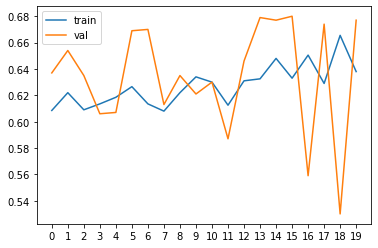

In [33]:
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='val')
plt.xticks(np.arange(20))
plt.legend()

## Question 5

Let's train our model for 10 more epochs using the same code as previously. Make sure you don't re-create the model - we want to continue training the model we already started training.

What is the mean of validation loss for the model trained with augmentations?

In [29]:
np.mean(history2.history['val_loss'])

0.6323038458824157

## Question 6

What's the average of validation accuracy for the last 5 epochs (from 6 to 10) for the model trained with augmentations?

In [27]:
data = [0.6690, 0.6700, 0.6130, 0.6350, 0.6210]

np.average(data)

0.6416

In [31]:
np.average(history2.history['val_accuracy'])

0.6343000024557114